## Environmental preparation

In [ ]:
# if not installed, install pyCaret (Optional)
# !pip install pyCaret --use-pep517

In [3]:
# Certify the installation
# !pip show pyCaret

## Test

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,0.9180,1.5326,1.2378,0.1286,0.1756,0.1578,1.6700
lightgbm,Light Gradient Boosting Machine,0.9197,1.5373,1.2397,0.1260,0.1758,0.1580,0.8720
br,Bayesian Ridge,0.9199,1.5390,1.2404,0.1251,0.1762,0.1583,0.1880
ridge,Ridge Regression,0.9199,1.5390,1.2404,0.1250,0.1763,0.1583,0.1750
huber,Huber Regressor,0.9181,1.5427,1.2419,0.1229,0.1770,0.1595,0.2500
omp,Orthogonal Matching Pursuit,0.9302,1.5650,1.2508,0.1102,0.1773,0.1597,0.1710
rf,Random Forest Regressor,0.9951,1.7582,1.3258,0.0003,0.1846,0.1677,4.6650
en,Elastic Net,0.9815,1.7588,1.3261,-0.0001,0.1885,0.1715,0.1740
llar,Lasso Least Angle Regression,0.9815,1.7588,1.3261,-0.0001,0.1885,0.1715,0.1660
lasso,Lasso Regression,0.9815,1.7588,1.3261,-0.0001,0.1885,0.1715,0.1700


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.9078,1.4988,1.2242,0.1281,0.1721,0.1531
1,0.9401,1.6128,1.2700,0.1269,0.1831,0.1671
2,0.9044,1.4931,1.2219,0.1304,0.1734,0.1558
3,0.9074,1.4676,1.2115,0.1485,0.1704,0.1530
4,0.9214,1.5437,1.2424,0.1311,0.1770,0.1599
5,0.9276,1.5815,1.2576,0.1174,0.1798,0.1622
6,0.9021,1.4639,1.2099,0.1326,0.1689,0.1503
7,0.9131,1.5413,1.2415,0.1289,0.1777,0.1593
8,0.9380,1.6022,1.2658,0.1104,0.1790,0.1603


Fitting 10 folds for each of 10 candidates, totalling 100 fits


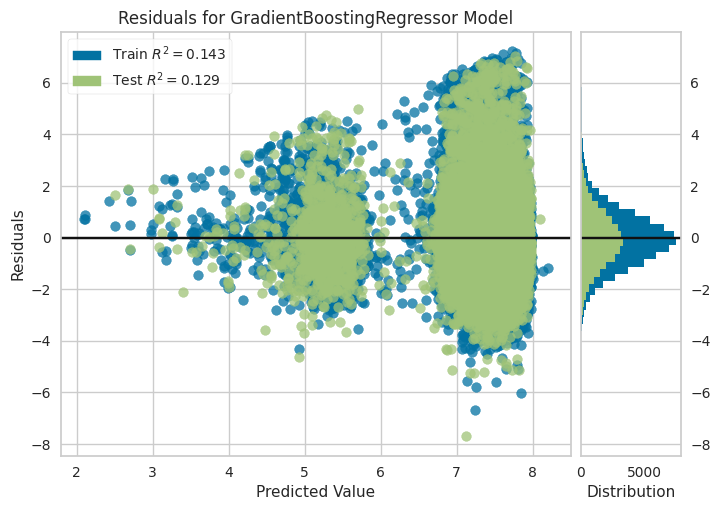

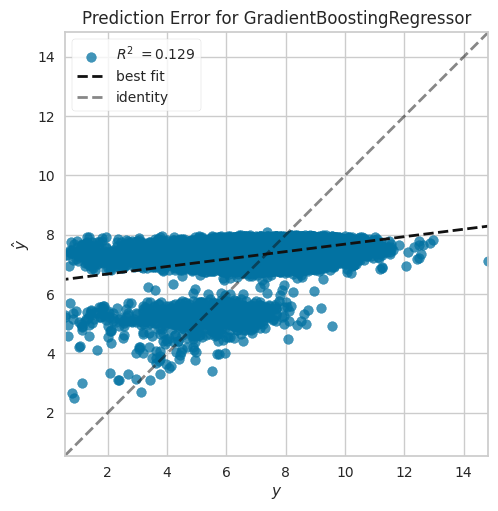

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['year', 'month', 'plurality',
                                              'mother_age'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_features=False,
                                                               missing_values=nan,
                                                               strategy='mean'))),
                 ('categorical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['s...
                                            criterion='friedman_mse', init=None,
              

In [19]:
import pandas as pd
from pycaret.regression import *

# CSVファイルの読み込み
data = pd.read_csv('natality_2001_train_100k.csv')

# PyCaretのセットアップ
regression_setup = setup(
    data=data,
    target='weight_pounds',    # 目的変数の指定
    session_id=42,             # 再現性のための乱数シード
    normalize=True,            # データの正規化（オプション）
    verbose=False              # 詳細な出力を表示しないようにする
)

# モデルの比較 (RMSEを基準に選択)
best_model = compare_models(sort='RMSE')

# モデルのチューニング（RMSEを最小化する形でハイパーパラメータの最適化）
tuned_model = tune_model(best_model, optimize='RMSE')

# 最良モデルの結果を散布図として可視化
plot_model(tuned_model, plot='residuals')  # 残差プロット
plot_model(tuned_model, plot='error')      # 予測 vs 実測値プロット

# チューニング後の最良モデルを保存
save_model(tuned_model, 'best_model_weight_pounds')


In [20]:
import zipfile

with zipfile.ZipFile('regression_model_package.zip', 'w') as zf:
    zf.write('best_model_weight_pounds.pkl')
    zf.write('requirements.txt')
    zf.write('pred.py')